Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.99it/s]

Confidence scores:
angry: 0.009682802493312657
disgust: 4.1174905794780955e-09
fear: 31.701921617755698
happy: 0.025628701988166334
sad: 0.37576414356212096
surprise: 60.47266596881557
neutral: 7.414339343984206


,Emotion,Score
0,angry,9.682802e-03
1,disgust,4.117491e-09
2,fear,3.170192e+01
3,happy,2.562870e-02
4,sad,3.757641e-01
5,surprise,6.047267e+01
6,neutral,7.414339e+00


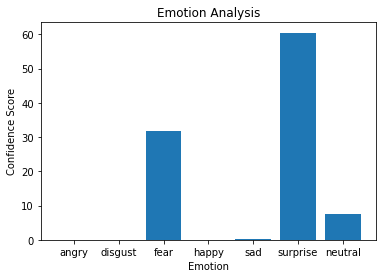

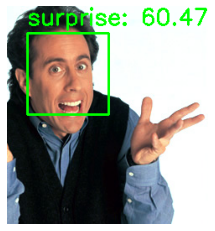

In [9]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Load the image
img = cv2.imread('Face7.jpg')

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

for (x, y, w, h) in faces:
    face_img = img[y:y+h, x:x+w]
    emotions = DeepFace.analyze(face_img, actions=['emotion'])
    emotion_label, emotion_score = max(emotions[0]['emotion'].items(), key=lambda x: x[1])
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img, emotion_label + ': ' + str(round(emotion_score, 2)), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    print("Confidence scores:")
    data = []
    for label, score in emotions[0]['emotion'].items():
        print(label + ":", score)
        data.append([label, score])
    df = pd.DataFrame(data, columns=['Emotion', 'Score'])
    display(df)
    plt.bar(emotions[0]['emotion'].keys(), emotions[0]['emotion'].values())
    plt.xlabel('Emotion')
    plt.ylabel('Confidence Score')
    plt.title('Emotion Analysis')
    plt.show()

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()